In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')

In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

In [3]:
%load_ext autoreload
%autoreload 2
import CCPA_lib as cp


In [4]:
sns.set_context('poster')

In [5]:
ppallete = "BuGn"
porder = ['MIT9313', 'Natl2A', 'C9B', 'MIT9312', 'MED4']
pedge = 'green'
apallete = "Oranges"
aorder = ['1A3', 'DE', 'DE1', 'ATCC', 'BS11']
aedge='orange'              

In [6]:
method_cols = [
     'cubic', 'exponential', #'exponential_segmented',
       'gompertz', 'harmonic', 'linear', 'logistic3', 'logistic4',
       'loglogistic', 'rodbard4', 'scurve', 'hyperbolic']


In [7]:
method_cols = [
    'exponential', #'exponential_segmented',
]


In [229]:
df = pd.read_pickle('CCPA.pkl.gz')

In [230]:
dfc = df.loc[(df.experiment.isin(['e1','e3', 'e4','e5', 'e6'])) & (df.culture == 'Co_Culture')]

In [231]:
df3 = df.loc[(df.experiment.isin(['e3'])) & (df.culture == 'Co_Culture') & (df.ALT == 'DE1')]

In [232]:
d = cp.generate_decline(dfc, scale=False)
d = d.loc[d.day < 85]

In [233]:
train_df_orig, test_df_orig = cp.split_train_test(d,test_size=0.4)

In [269]:
train_df = cp.augment_training(train_df_orig)
train_df = train_df.loc[train_df.day <= 80]
test_df = cp.resample_df(test_df_orig, period='1d')
test_df = test_df.loc[test_df.day <= 80]

In [270]:
train_df.head()

,experiment_sample,experiment,sample,PRO,ALT,culture,day,FL,augment_name,experiment_sample_orig
0,"e1, 10B, original_mean",e1,10B,C9B,DE,Co_Culture,0,4.951,original_mean,"e1, 10B"
1,"e1, 10B, original_mean",e1,10B,C9B,DE,Co_Culture,1,3.038,original_mean,"e1, 10B"
2,"e1, 10B, original_mean",e1,10B,C9B,DE,Co_Culture,2,NaN,original_mean,"e1, 10B"
3,"e1, 10B, original_mean",e1,10B,C9B,DE,Co_Culture,3,NaN,original_mean,"e1, 10B"
4,"e1, 10B, original_mean",e1,10B,C9B,DE,Co_Culture,4,2.803,original_mean,"e1, 10B"


In [298]:
X_train = cp.experiments2X(train_df, cumsummode=False, value_col='FL')
metadf_train = cp.get_meta(train_df)
metadf_train.index = metadf_train.experiment_sample

X_test = cp.experiments2X(test_df, cumsummode=False, value_col='FL')
metadf_test = cp.get_meta(test_df)
metadf_test.index = metadf_test.experiment_sample


In [317]:
y_train = metadf_train.PRO + ','+ metadf_train.ALT
y_test = metadf_test.PRO + ','+ metadf_test.ALT


In [318]:
clf = cp.forest_classifier(X=X_train, y=y_train)
r = cp.score_model('', clf, X_train, y_train, X_test, y_test, return_y=True)


train score 0.9707317073170731


In [319]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7380, 81), (7380,), (138, 81), (138,))

In [320]:
(clf, res, y_df) = r

In [321]:
res

{'model': '',
 'n_features': 81,
 'orig_n_features': 81,
 'accuracy_train': 0.9901084010840109,
 'precision_train': 0.9902436408653555,
 'recall_train': 0.9901084010840109,
 'f1_train': 0.9901291844232794,
 'support_train': None,
 'accuracy_test': 0.7463768115942029,
 'precision_test': 0.7465294551798175,
 'recall_test': 0.7463768115942029,
 'f1_test': 0.7448300361610772,
 'support_test': None}

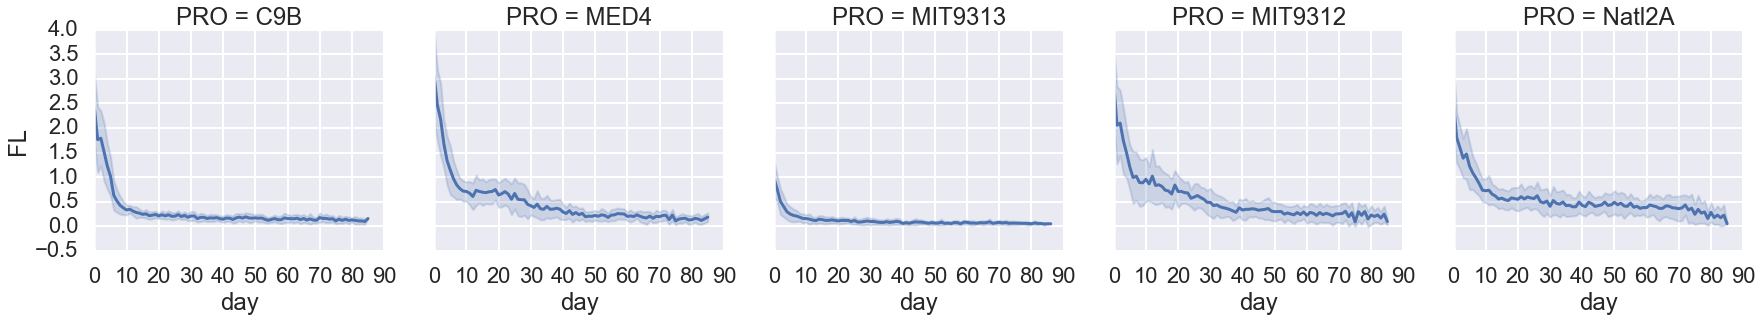

In [322]:
sns.relplot(data=ds, x='day', y='FL',  kind='line', legend=None, col='PRO', ci='sd')

In [323]:
y_df.head()

,_y,_y_PRO,_y_pred,_y_pred_PRO,Type
experiment_sample,,,,,
"e1, 10B, FL_0.05_0_first","C9B,DE",C9B,"C9B,DE",C9B,Train
"e1, 10B, FL_0.05_0_last","C9B,DE",C9B,"C9B,DE",C9B,Train
"e1, 10B, FL_0.05_0_max","C9B,DE",C9B,"C9B,DE",C9B,Train
"e1, 10B, FL_0.05_0_mean","C9B,DE",C9B,"C9B,DE",C9B,Train
"e1, 10B, FL_0.05_0_median","C9B,DE",C9B,"C9B,DE",C9B,Train


accuracy: 0.42028985507246375
              precision    recall  f1-score   support

     C9B,1A3       1.00      0.83      0.91         6
    C9B,ATCC       0.00      0.00      0.00         2
    C9B,BS11       0.50      0.33      0.40         6
      C9B,DE       0.60      1.00      0.75         6
     C9B,DE1       0.83      0.83      0.83         6
    MED4,1A3       0.33      0.20      0.25         5
   MED4,ATCC       0.60      0.60      0.60         5
   MED4,BS11       0.25      0.40      0.31         5
     MED4,DE       0.60      0.50      0.55         6
    MED4,DE1       0.36      0.67      0.47         6
 MIT9312,1A3       0.67      0.33      0.44         6
MIT9312,ATCC       0.00      0.00      0.00         5
MIT9312,BS11       0.29      0.33      0.31         6
  MIT9312,DE       0.00      0.00      0.00         6
 MIT9312,DE1       0.29      0.80      0.42         5
 MIT9313,1A3       0.33      0.40      0.36         5
MIT9313,ATCC       0.60      0.60      0.60        

C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wosnat\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


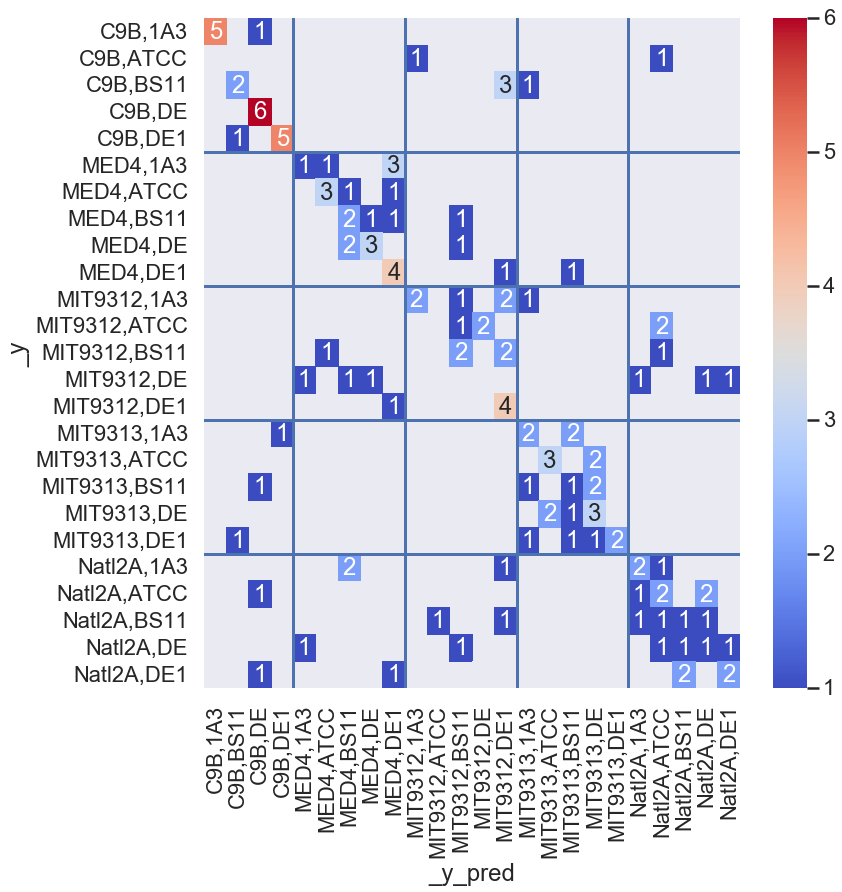

In [324]:
    from sklearn.metrics import classification_report, accuracy_score
    
    t = y_df.loc[y_df.Type == 'Test'].pivot_table(index='_y', columns=['_y_pred'], 
                                                  values=['Type'], aggfunc='count')
    t.columns = t.columns.get_level_values(1)
    print(f"accuracy: {accuracy_score(y_true=y_df.loc[y_df.Type == 'Test']['_y'], y_pred=y_df.loc[y_df.Type == 'Test']['_y_pred'])}")
    print(classification_report(y_true=y_df.loc[y_df.Type == 'Test']['_y'], y_pred=y_df.loc[y_df.Type == 'Test']['_y_pred']))

    #forest_feature_importance(clf, X.columns)
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(t, annot=True, cmap='coolwarm', ax=ax)
    ax.axhline(5)
    ax.axhline(15)
    ax.axhline(20)
    ax.axhline(10)
    ax.axvline(4)
    ax.axvline(9)
    ax.axvline(14)
    ax.axvline(19)
#    sns.heatmap(t, annot=True, cmap='coolwarm')


accuracy: 0.7463768115942029
              precision    recall  f1-score   support

         C9B       0.80      0.77      0.78        26
        MED4       0.72      0.85      0.78        27
     MIT9312       0.59      0.57      0.58        28
     MIT9313       0.89      0.89      0.89        27
      Natl2A       0.74      0.67      0.70        30

   micro avg       0.75      0.75      0.75       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.75      0.75      0.74       138



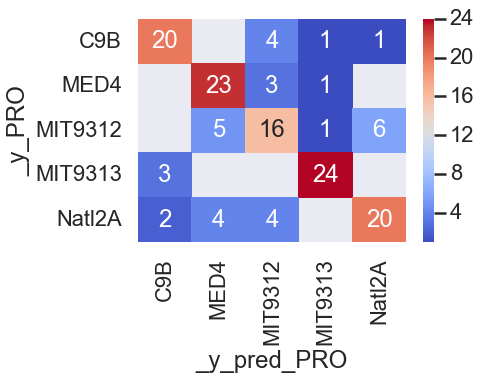

In [325]:
    from sklearn.metrics import classification_report, accuracy_score
    
    t = y_df.loc[y_df.Type == 'Test'].pivot_table(index='_y_PRO', columns=['_y_pred_PRO'], 
                                                  values=['Type'], aggfunc='count')
    t.columns = t.columns.get_level_values(1)
    print(f"accuracy: {accuracy_score(y_true=y_df.loc[y_df.Type == 'Test']['_y_PRO'], y_pred=y_df.loc[y_df.Type == 'Test']['_y_pred_PRO'])}")
    print(classification_report(y_true=y_df.loc[y_df.Type == 'Test']['_y_PRO'], y_pred=y_df.loc[y_df.Type == 'Test']['_y_pred_PRO']))

    #forest_feature_importance(clf, X.columns)

    sns.heatmap(t, annot=True, cmap='coolwarm')


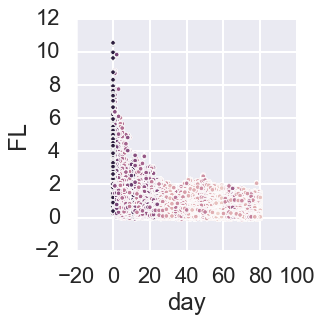

In [326]:
feature_importances = pd.DataFrame(clf.estimator_.feature_importances_, #clf.estimator_.feature_importances_,
                                   index = X_train.columns[clf.support_],
                                    columns=['importance'])
mergedf = train_df_orig.merge(feature_importances, left_on='day', right_index=True, how='left')
mergedf.head()
sns.relplot(data=mergedf, x='day', y='FL', hue='importance', legend=None)

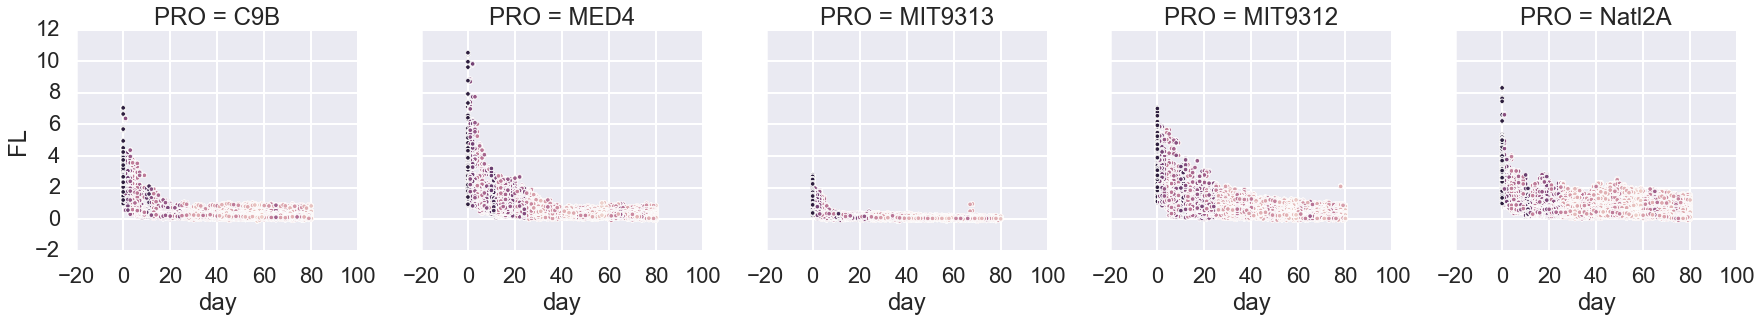

In [327]:
sns.relplot(data=mergedf, x='day', y='FL', hue='importance', legend=None, col='PRO')

In [329]:
y_train = metadf_train.PRO 
y_test = metadf_test.PRO 


In [330]:
clf = cp.forest_classifier(X=X_train, y=y_train)
r = cp.score_model('', clf, X_train, y_train, X_test, y_test, return_y=True)


train score 0.9726287262872628


In [331]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7380, 81), (7380,), (138, 81), (138,))

In [332]:
(clf, res, y_df) = r

In [333]:
res

{'model': '',
 'n_features': 40,
 'orig_n_features': 81,
 'accuracy_train': 0.9726287262872628,
 'precision_train': 0.9733383419543843,
 'recall_train': 0.9726287262872628,
 'f1_train': 0.9727250345732695,
 'support_train': None,
 'accuracy_test': 0.7463768115942029,
 'precision_test': 0.7534018963603083,
 'recall_test': 0.7463768115942029,
 'f1_test': 0.7471033314511576,
 'support_test': None}

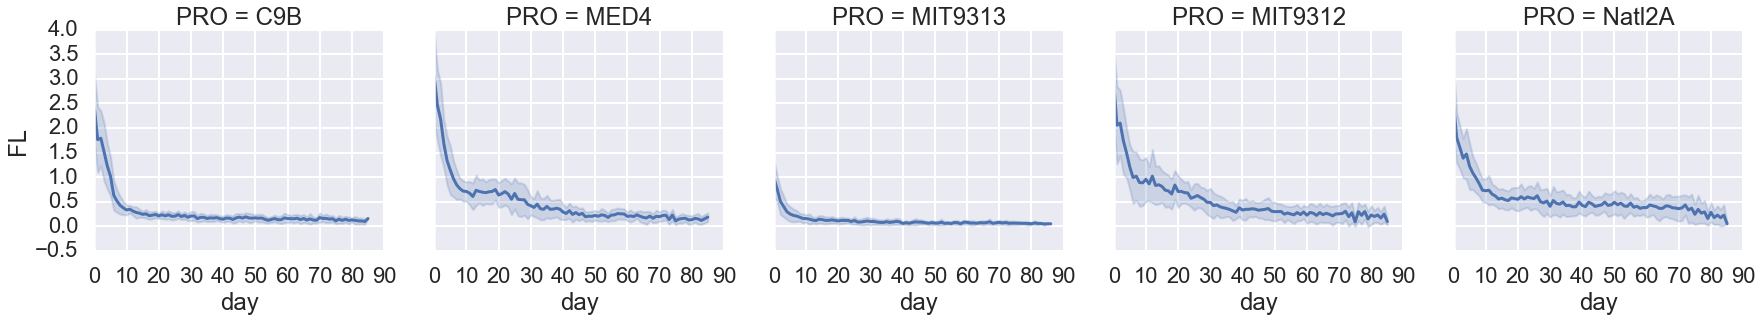

In [334]:
sns.relplot(data=ds, x='day', y='FL',  kind='line', legend=None, col='PRO', ci='sd')

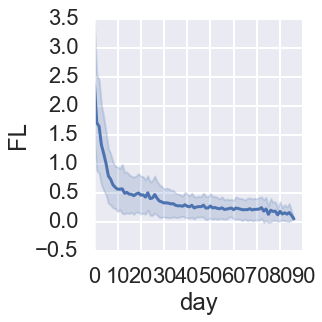

In [335]:
sns.relplot(data=ds, x='day', y='FL',  kind='line', legend=None, #col='PRO', 
            ci='sd')

In [336]:
y_df.head()

,_y,_y_PRO,_y_pred,_y_pred_PRO,Type
experiment_sample,,,,,
"e1, 10B, FL_0.05_0_first",C9B,C9B,C9B,C9B,Train
"e1, 10B, FL_0.05_0_last",C9B,C9B,C9B,C9B,Train
"e1, 10B, FL_0.05_0_max",C9B,C9B,C9B,C9B,Train
"e1, 10B, FL_0.05_0_mean",C9B,C9B,C9B,C9B,Train
"e1, 10B, FL_0.05_0_median",C9B,C9B,C9B,C9B,Train


accuracy: 0.7463768115942029
              precision    recall  f1-score   support

         C9B       0.91      0.81      0.86        26
        MED4       0.74      0.63      0.68        27
     MIT9312       0.61      0.61      0.61        28
     MIT9313       0.89      0.93      0.91        27
      Natl2A       0.64      0.77      0.70        30

   micro avg       0.75      0.75      0.75       138
   macro avg       0.76      0.75      0.75       138
weighted avg       0.75      0.75      0.75       138



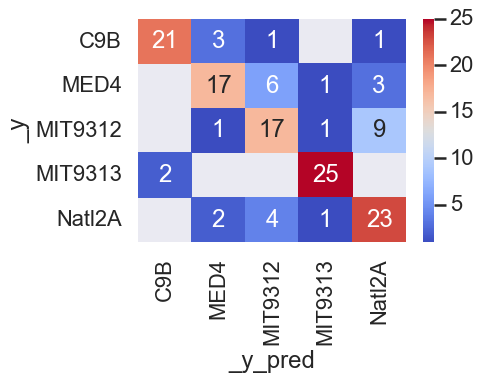

In [337]:
    from sklearn.metrics import classification_report, accuracy_score
    
    t = y_df.loc[y_df.Type == 'Test'].pivot_table(index='_y', columns=['_y_pred'], 
                                                  values=['Type'], aggfunc='count')
    t.columns = t.columns.get_level_values(1)
    print(f"accuracy: {accuracy_score(y_true=y_df.loc[y_df.Type == 'Test']['_y'], y_pred=y_df.loc[y_df.Type == 'Test']['_y_pred'])}")
    print(classification_report(y_true=y_df.loc[y_df.Type == 'Test']['_y'], y_pred=y_df.loc[y_df.Type == 'Test']['_y_pred']))

    #forest_feature_importance(clf, X.columns)

    sns.heatmap(t, annot=True, cmap='coolwarm')


C:\Users\wosnat\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:963: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


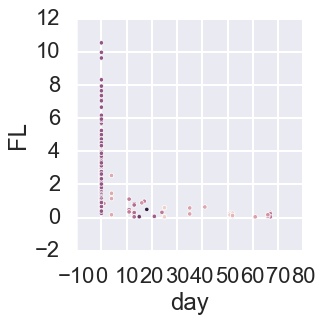

In [338]:
feature_importances = pd.DataFrame(clf.estimator_.feature_importances_, #clf.estimator_.feature_importances_,
                                   index = X_train.columns[clf.support_],
                                    columns=['importance'])
mergedf = train_df_orig.merge(feature_importances, left_on='day', right_index=True, how='left')
mergedf.head()
sns.relplot(data=mergedf, x='day', y='FL', hue='importance', legend=None)

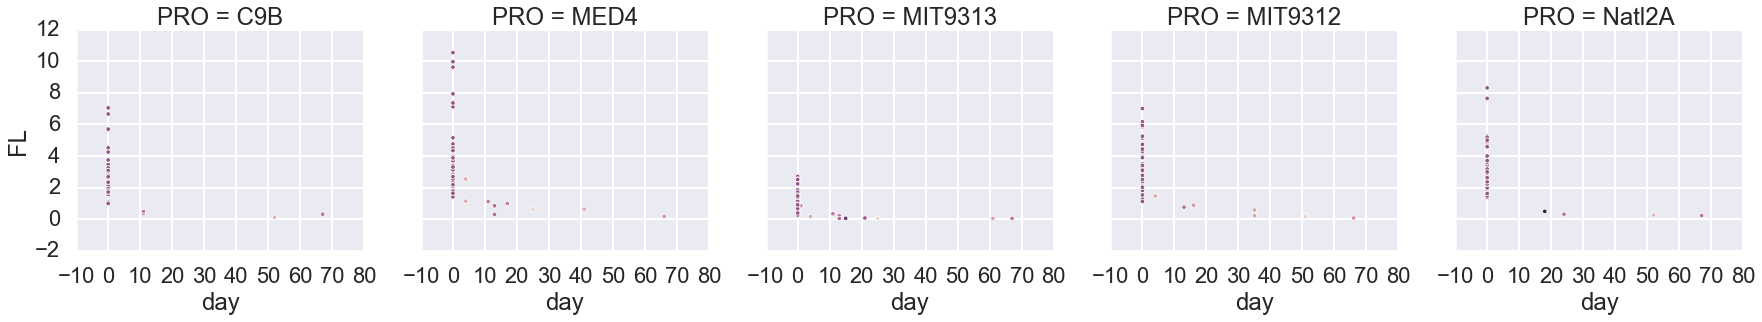

In [339]:
sns.relplot(data=mergedf, x='day', y='FL', hue='importance', legend=None, col='PRO')

# cluster by decline

In [296]:
value_col = 'decline'

In [263]:
#dfe['sample_experiment'] = dfe['sample']+ ','+ dfe['experiment']
#sample_col = 'sample_experiment'
sample_col = 'experiment_sample'
dfe_resample3 = cp.resample_df(dfe, value_col=value_col, period='5d')
X = cp.experiments2X(dfe_resample3, value_col=value_col, cumsummode=False)
metadf = cp.get_meta(dfe)
metadf['sample_experiment'] = metadf['sample']+ ','+ metadf['experiment']
dfpca = cp.run_pca(X=X, metadf=metadf, sample_col=sample_col)

NameError: name 'dfe' is not defined

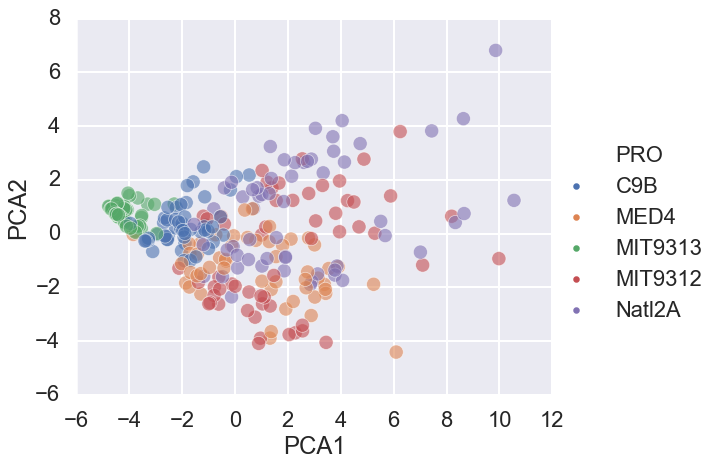

In [538]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', 
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            #palette=ppallete, hue_order=porder,edgecolor=pedge,
           )

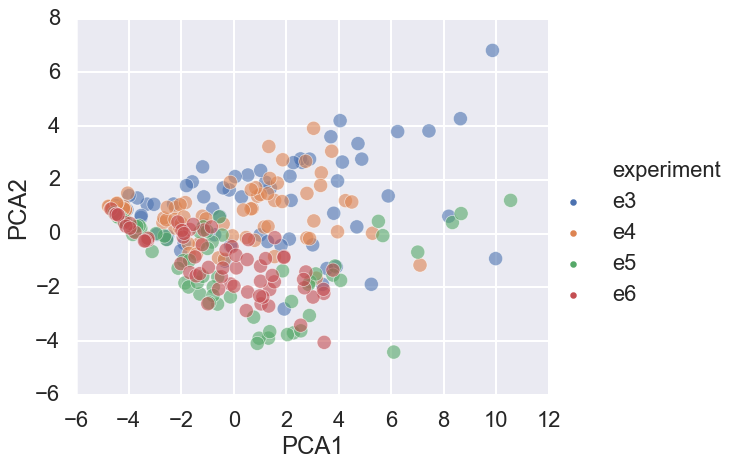

In [544]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='experiment', 
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            #palette=ppallete, hue_order=porder,edgecolor=pedge,
           )

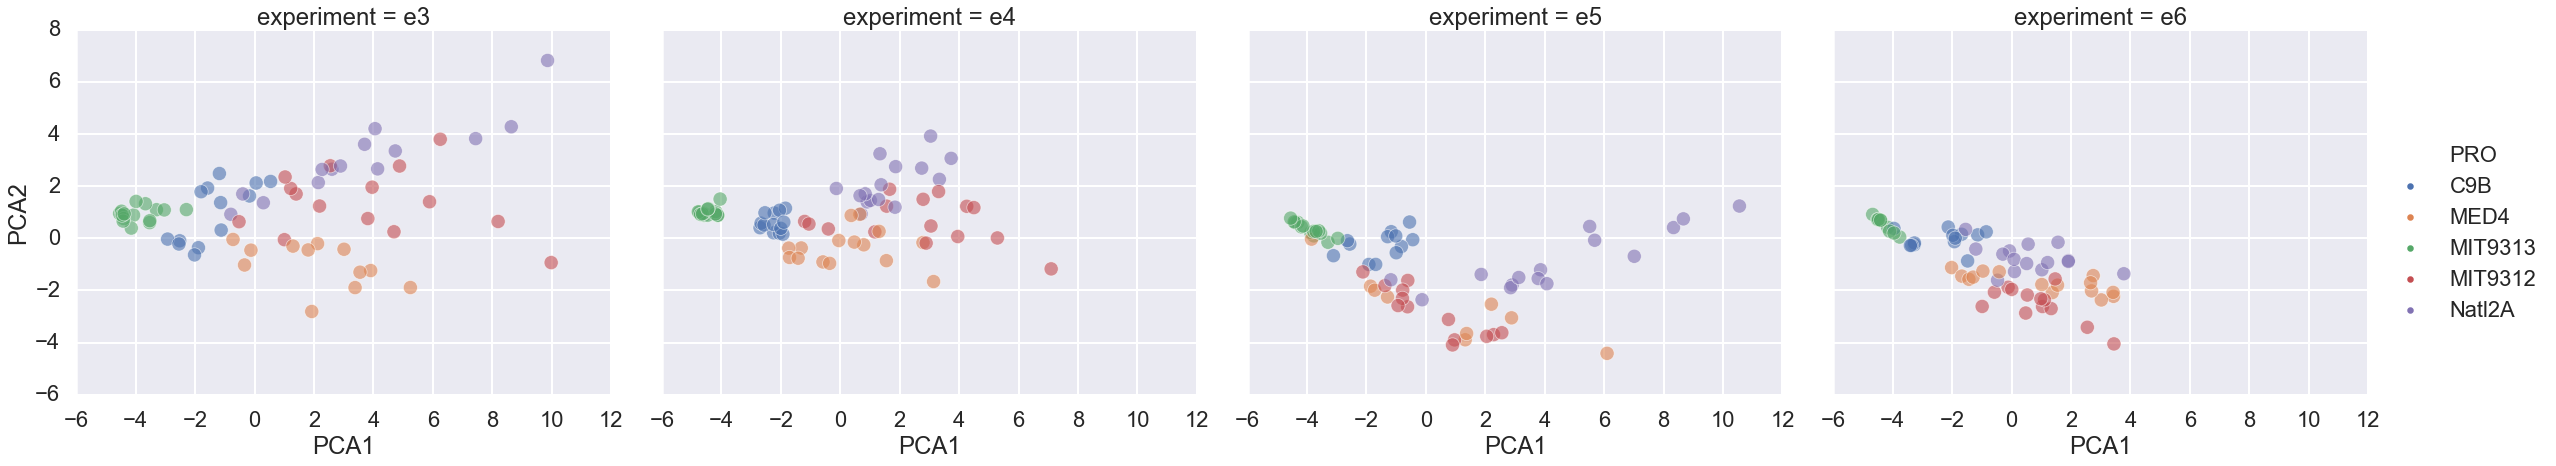

In [539]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='PRO', col='experiment',
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            #palette=ppallete, hue_order=porder,edgecolor=pedge,
           )

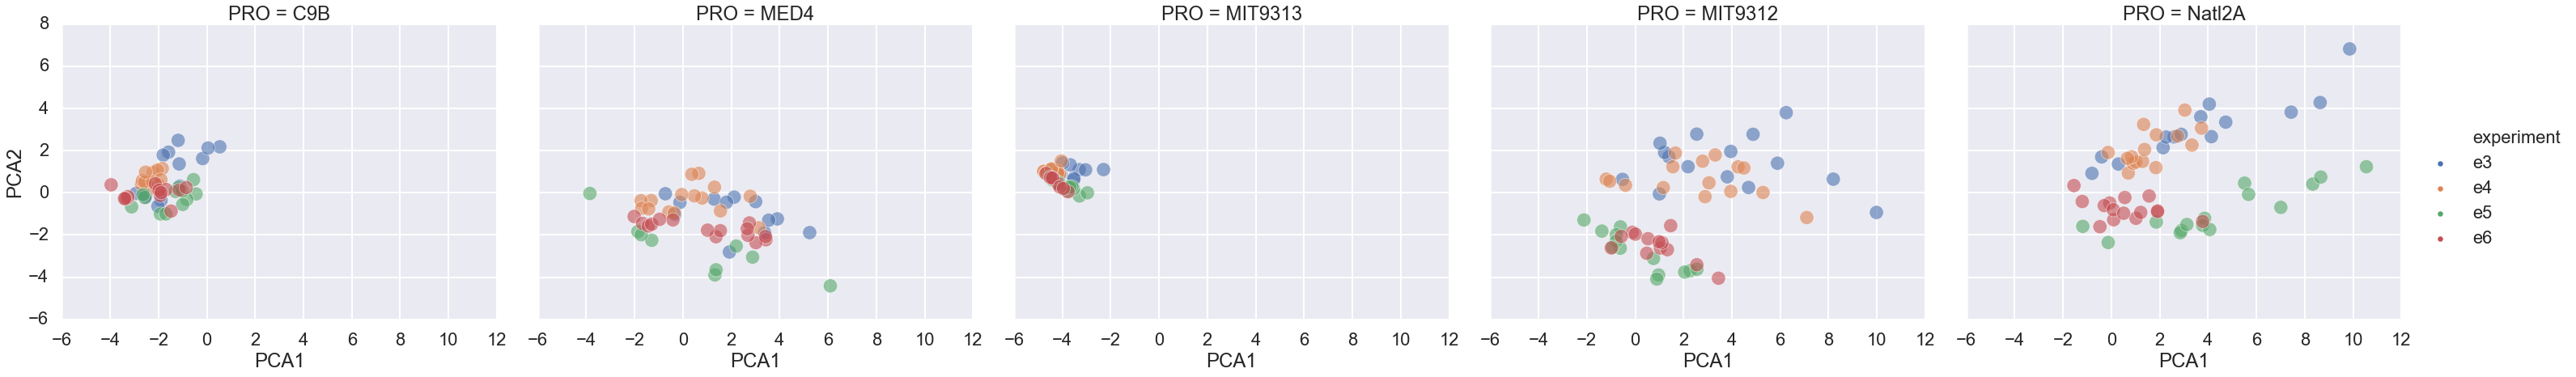

In [551]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', col='PRO', hue='experiment',
            #style='ALT',
            s=300, alpha=0.6, height=7, aspect=1.2,
            #palette=ppallete, hue_order=porder,edgecolor=pedge,
           )

In [540]:
#metadf = cp.get_meta(df, meta_col=['experiment_sample', 'Mode','Sample', 'PRO', 'ALT'])
#metadf = metadf.loc[metadf.experiment_sample.isin(X1.index)]
metadf.index = metadf[sample_col]
col = 'PRO'
lut = dict(zip(metadf[col].unique(), sns.color_palette('Set2', n_colors=metadf[col].nunique())))
row_colors = metadf[col].map(lut)

col2 = 'experiment'
lut2 = dict(zip(metadf[col2].unique(), sns.color_palette('Set3', n_colors=metadf[col2].nunique())))
row_colors2 = metadf[col2].map(lut2)

#dfe_resample3 = cp.resample_df(dfe, value_col='decline', period='3d')
#X = cp.experiments2X(dfe_resample3, value_col='decline', cumsummode=False)


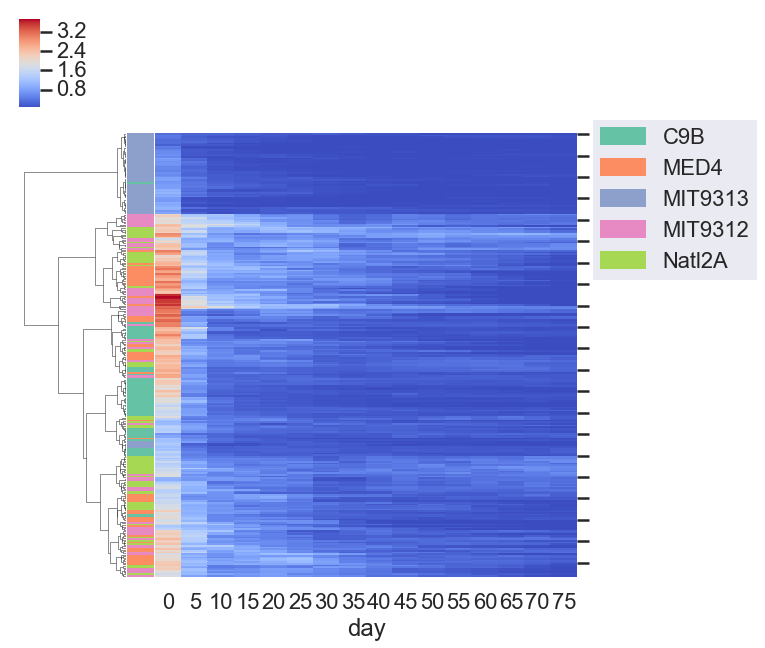

In [541]:
import matplotlib.patches as mpatches
g = sns.clustermap(data=X, col_cluster=False, #row_cluster=False,
                   cmap="coolwarm", 
                   row_colors=[row_colors, 
                       #row_colors2
                              ], 
               method='ward'
                  )
g.ax_heatmap.set_yticklabels('')
g.ax_heatmap.set_ylabel('')
legend_TN =  [mpatches.Patch(color=c, label=l) for l,c in lut.items()]
#legend_TN.extend([mpatches.Patch(color=c, label=l) for l,c in lut2.items()])

l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)

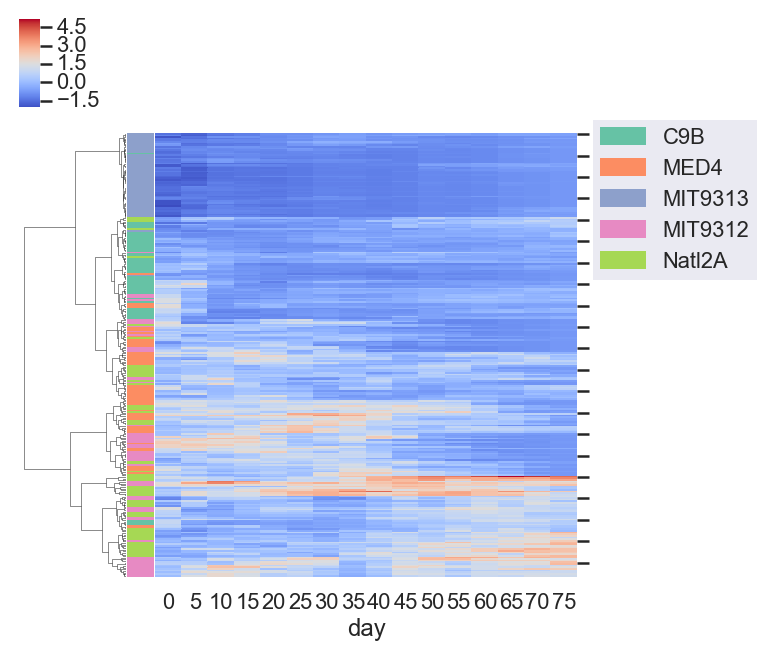

In [542]:
import matplotlib.patches as mpatches
g = sns.clustermap(data=X, col_cluster=False, #row_cluster=False,
                   cmap="coolwarm", 
                   row_colors=[row_colors, 
                       #row_colors2
                              ], 
               method='ward',
                   z_score=1
                  )
g.ax_heatmap.set_yticklabels('')
g.ax_heatmap.set_ylabel('')
legend_TN =  [mpatches.Patch(color=c, label=l) for l,c in lut.items()]
#legend_TN.extend([mpatches.Patch(color=c, label=l) for l,c in lut2.items()])

l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)

In [536]:
X.index

Index(['e3, 10A', 'e3, 10B', 'e3, 10C', 'e3, 11A', 'e3, 11B', 'e3, 11C',
       'e3, 12A', 'e3, 12B', 'e3, 12C', 'e3, 13A',
       ...
       'e6, 6B', 'e6, 6C', 'e6, 7A', 'e6, 7C', 'e6, 8A', 'e6, 8B', 'e6, 8C',
       'e6, 9A', 'e6, 9B', 'e6, 9C'],
      dtype='object', name='experiment_sample', length=269)

# cluster by exponential

In [553]:
value_col='exponential'

In [554]:
X = dfe.groupby(['experiment_sample','popt_0', 'popt_1', 'popt_2'])['decline'].count().reset_index(level=[1,2,3])\
.drop(columns='decline')

In [557]:
dfe['sample_experiment'] = dfe['sample']+ ','+ dfe['experiment']
#sample_col = 'sample_experiment'
sample_col = 'experiment_sample'
dfe_resample3 = cp.resample_df(dfe, value_col=value_col, period='3d')
X = cp.experiments2X(dfe_resample3, value_col=value_col, cumsummode=False)
metadf = cp.get_meta(dfe)
metadf['sample_experiment'] = metadf['sample']+ ','+ metadf['experiment']
dfpca = cp.run_pca(X=X, metadf=metadf, sample_col=sample_col)

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Variance percent explained
 [0.77191076 0.15905594]


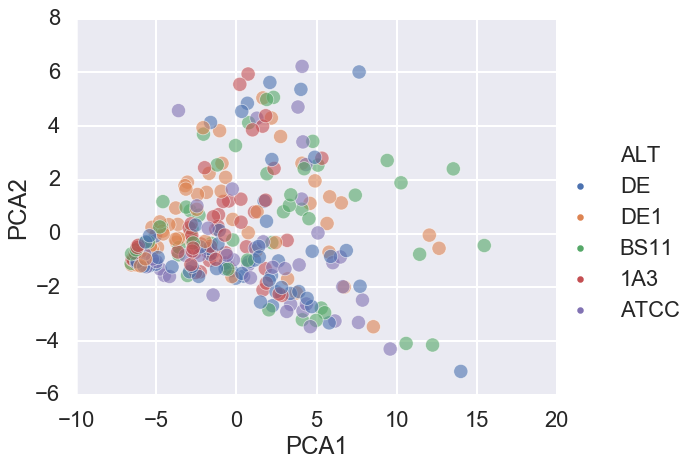

In [558]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', hue='ALT', 
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            #palette=ppallete, hue_order=porder,edgecolor=pedge,
           )

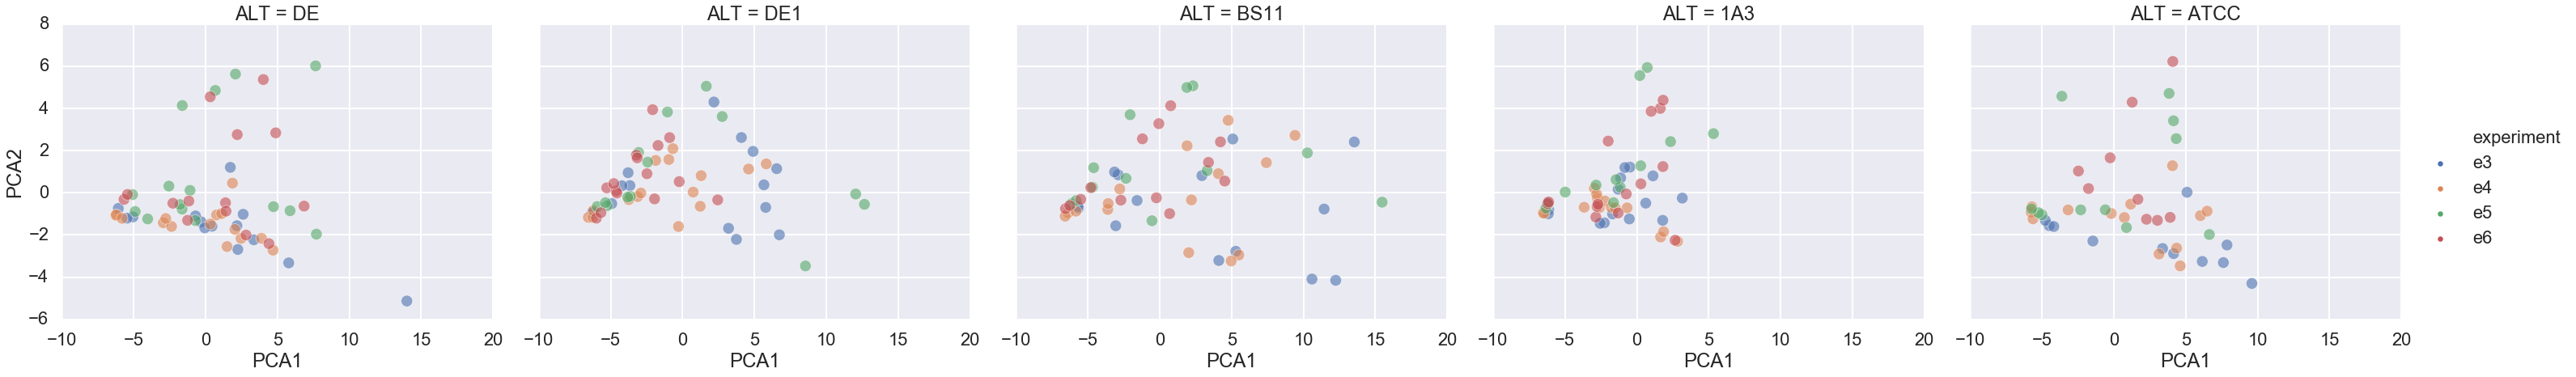

In [561]:
sns.relplot(data=dfpca, x='PCA1', y='PCA2', col='ALT', hue='experiment',
            #style='ALT',
            s=200, alpha=0.6, height=7, aspect=1.2,
            #palette=ppallete, hue_order=porder,edgecolor=pedge,
           )

In [562]:
#metadf = cp.get_meta(df, meta_col=['experiment_sample', 'Mode','Sample', 'PRO', 'ALT'])
#metadf = metadf.loc[metadf.experiment_sample.isin(X1.index)]
metadf.index = metadf[sample_col]
col = 'PRO'
lut = dict(zip(metadf[col].unique(), sns.color_palette('Set2', n_colors=metadf[col].nunique())))
row_colors = metadf[col].map(lut)

col2 = 'ALT'
lut2 = dict(zip(metadf[col2].unique(), sns.color_palette('Set3', n_colors=metadf[col2].nunique())))
row_colors2 = metadf[col2].map(lut2)

#dfe_resample3 = cp.resample_df(dfe, value_col='decline', period='3d')
#X = cp.experiments2X(dfe_resample3, value_col='decline', cumsummode=False)


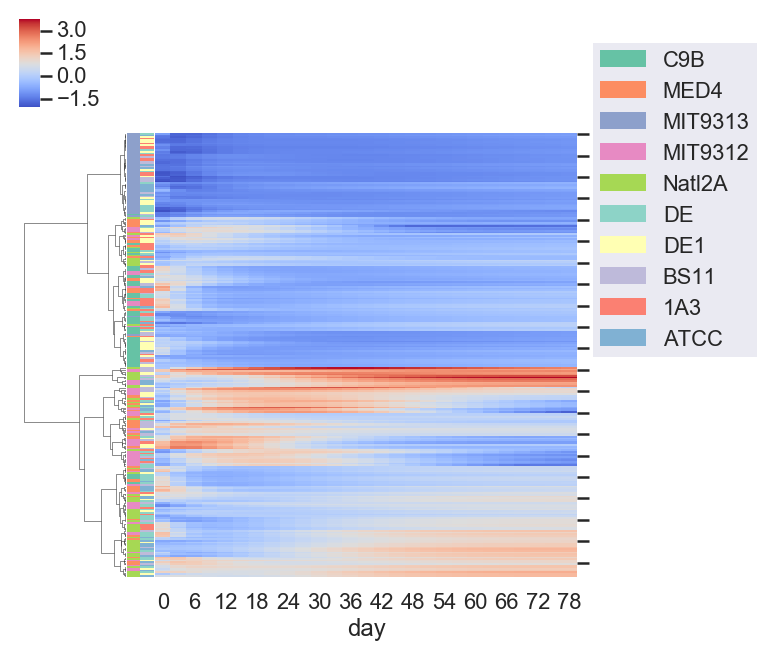

In [563]:
import matplotlib.patches as mpatches
g = sns.clustermap(data=X, col_cluster=False, #row_cluster=False,
                   cmap="coolwarm", 
                   row_colors=[row_colors, 
                       row_colors2
                              ], 
               method='ward',
                   z_score=1,
                  )
g.ax_heatmap.set_yticklabels('')
g.ax_heatmap.set_ylabel('')
legend_TN =  [mpatches.Patch(color=c, label=l) for l,c in lut.items()]
legend_TN.extend([mpatches.Patch(color=c, label=l) for l,c in lut2.items()])

l2=g.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.01,0.85),handles=legend_TN,frameon=True)

In [515]:
X.head()

day,0,3,6,9,12,15,18,21,24,27,...,51,54,57,60,63,66,69,72,75,78
experiment_sample,,,,,,,,,,,,,,,,,,,,,
"e3, 10A",2.961682,1.448054,0.789202,0.502417,0.377585,0.323249,0.299597,0.289302,0.284821,0.282870,...,0.281368,0.281367,0.281367,0.281367,0.281367,0.281367,0.281367,0.281367,0.281367,0.281367
"e3, 10B",2.970218,1.438053,0.769731,0.478213,0.351054,0.295588,0.271394,0.260841,0.256238,0.254230,...,0.252678,0.252677,0.252677,0.252676,0.252676,0.252676,0.252676,0.252676,0.252676,0.252676
"e3, 10C",2.811843,1.312048,0.696138,0.443207,0.339338,0.296683,0.279166,0.271972,0.269018,0.267805,...,0.266960,0.266960,0.266960,0.266959,0.266959,0.266959,0.266959,0.266959,0.266959,0.266959
"e3, 11A",1.739532,1.545376,1.375904,1.227977,1.098858,0.986153,0.887778,0.801909,0.726957,0.661534,...,0.363716,0.344474,0.327678,0.313017,0.300221,0.289051,0.279301,0.270791,0.263363,0.257880
"e3, 11B",2.778817,2.266453,1.853728,1.521265,1.253456,1.037727,0.863951,0.723969,0.611210,0.520378,...,0.210835,0.197864,0.187415,0.178998,0.172218,0.166757,0.162357,0.158814,0.155959,0.153998
